In [1]:
import pandas as pd # for dataframe and manipulation of data
import numpy as np # For numerical computing 
from glob import glob# for path declaration 
import os #interacting with pathways and operating systems
import matplotlib.pyplot as plt # for creation of visualization like charts, piecharts
import warnings # handles warning 
warnings.filterwarnings("ignore")#supreses warning messages
import cv2 #Import openCV for image processing
from sklearn.model_selection import train_test_split #imports traintest split function to split the dataset
from sklearn.preprocessing import LabelEncoder #converts categorical variables to numerical formats
import tensorflow as tf#imported framework for deep learning training
from keras.utils import to_categorical# coverts class labels to one hot encoding
from tensorflow.keras import layers, models #provides interface for building and training a model
from tensorflow.keras.optimizers import Adam # imports optimizer for neural building and training from tensorflow 
from tensorflow.keras.layers import BatchNormalization, Dropout # to reduce overfitting and improve convergence in model.
from tensorflow.keras.regularizers import l2#imports l2 regularization to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping #to stop model from further training when it stops to improve
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#imports classification metrics
from imblearn.over_sampling import SMOTE#imported to address imbalance classification problem
from sklearn.metrics import confusion_matrix#to evaluate performance of the classification problem
from keras.models import Sequential#Allows you to build your model step by step
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout#support various in the model development
import seaborn as sns#seaborn libray for visualization plots like line graphs , charts etc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3, MobileNetV2#imports pre-trained deep models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D#for customizing the neural network
from tensorflow.keras.models import Model#Allowsyou to create model using functional API
from tensorflow.keras.utils import to_categorical#convert class labels to one hot encoding

In [2]:
imgFolder = r"C:\Users\USER\Desktop\Weather Image Classifier\dataset"#path to dataset 

In [3]:
# obtain the list of image folders

os.listdir(imgFolder)

['dew', 'frost', 'glaze', 'lightning', 'rain', 'rainbow', 'sandstorm', 'snow']

In [4]:
imgList = []  # Initialize an empty list to save our images

for imgFolderName in os.listdir(imgFolder):  # Iterate over subdirectories in the image folder
    imgFolderPath = os.path.join(imgFolder, imgFolderName)  # Get the subdirectory's path
    # Use glob to match all desired image extensions
    for image_path in glob(os.path.join(imgFolderPath, "*.[pPjJ][nNpPjJeE][gG]")):
        imgList.append(image_path)  # Add the image path to the imgList

In [5]:
images_df = [] #initialize an empty list to save images

for imgFoldername in os.listdir(imgFolder):#iterate over subdirectories in the image folder
    imgFolderPath = os.path.join(imgFolder, imgFoldername)#getting the subdirectories path
    for imagePath in glob(os.path.join(imgFolderPath, "*.[pPjJ][nNpPjJeE][gG]")):#going through the image files(JPG) in the current subdirectory
        images_df.append([imagePath, imgFoldername])#add the image path and image folder name to the image_df

### Dataframe Creation

#### "WeatherImageDF" with two columns named "image" column being our X input and "Target" column being Y output.

In [6]:
WeatherImageDF= pd.DataFrame(images_df, columns=['image', 'target'])#create dataframe from images_df with column image and target

In [7]:
class_counts = WeatherImageDF ['target'].value_counts()#checking the class distribution
print(class_counts)#printing the output of the distribution

dew          698
sandstorm    692
glaze        639
snow         620
rain         526
frost        475
lightning    377
rainbow      232
Name: target, dtype: int64


In [8]:
# Load and preprocess the image data
X = []
y = LabelEncoder().fit_transform(WeatherImageDF ['target'])  # Convert target labels to numeric

for image_path in WeatherImageDF ['image']:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # Resize the image to the desired dimensions
    X.append(image)

X = np.array(X) #storing the images

# X = []
# y = LabelEncoder().fit_transform(WeatherImageDF ['target'])  # Convert target labels to numeric

# for image_path in WeatherImageDF ['image']:
#     image = cv2.imread(image_path)
#     if image is None:
#         print(f"Error reading image: {image_path}")
#         continue  # Skip to the next iteration if the image is None
#     try:
#         image = cv2.resize(image, (64, 64))  # Resize the image to the desired dimensions
#         X.append(image)
#     except cv2.error as e:
#         print(f"Error resizing image: {image_path} - {e}")

# X = np.array(X) #storing the images

# print(f"Processed {len(X)} images out of {len(WeatherImageDF)}")

# # Proceed with further processing or model training


In [9]:
len(WeatherImageDF) 

4259

### SMOTE IMPLMENTATION 

#### From the cell above , we can see we have an inbalance class , SMOTE was implemented to balance the classes.

In [11]:
smote = SMOTE(sampling_strategy='minority', random_state=100)#Implement SMOTE 
X_sm, y_sm = smote.fit_resample(X.reshape(-1, 64*64*3), y)
y_sm_counts = pd.Series(y_sm).value_counts()#checking the class distribution after SMOTE
print(y_sm_counts)

0    698
5    698
6    692
2    639
7    620
4    526
1    475
3    377
dtype: int64


In [12]:
WeatherImageDF.isna().sum()

image     0
target    0
dtype: int64

### SPLITTING OF OUR DATASET
####  We are using the train_test_split() function from scikit-learn to split the dataset into three parts,60% train,20%test and 20%validation.

In [13]:
# Splitting the data into train, test, and validation sets 
test_size = 0.2
validation_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=test_size, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=100)

In [14]:
from keras.utils import to_categorical

# Encode our labels into a numerical numbers for multiclassification
encoder = LabelEncoder()
encoder.fit(y_train)
train_y = to_categorical(encoder.transform(y_train))
test_y = to_categorical(encoder.transform(y_test))
val_y = to_categorical(encoder.transform(y_val))

In [15]:
y_train

array([1, 7, 6, ..., 7, 6, 0])

In [16]:
train_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### OVERVIEW OF THE DATASET
#### Let's print the shape of the images and labels

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3024, 12288)
(945, 12288)
(756, 12288)


In [18]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3024,)
(945,)
(756,)


In [19]:
 IMAGE_SIZE = 64

### DATA NORMALIZATION AND RESCALING
#### The **image pixel values range from 0-255**, our method of normalization will be **scaling** - we will **divide all the pixel values by 255 to standardize the images to have values between 0-1 and converted the image dimension to 64,64,3.**

In [20]:
def create_dataset(df, image_size):#takes in two parameters
    tmp = np.zeros((len(df), image_size, image_size, 3), dtype="float32")

    for n in range(0, len(df)):#going through each row in a dataframe
        im = df[n].reshape(image_size, image_size, 3)  # Reshaping the image data to 224,224,3
        tmp[n] = im / 255.0  # Normalize the image by dividing by 255

    print(tmp.shape, tmp.size)#print shape of the array
    return tmp#returns a normalized and reshaped array

In [21]:
x_train = create_dataset(X_train, IMAGE_SIZE)

(3024, 64, 64, 3) 37158912


In [22]:
x_test = create_dataset(X_test, IMAGE_SIZE)

(945, 64, 64, 3) 11612160


In [23]:
x_val = create_dataset(X_val, IMAGE_SIZE)

(756, 64, 64, 3) 9289728


In [24]:
x_train

array([[[[0.5568628 , 0.4745098 , 0.46666667],
         [0.5647059 , 0.5568628 , 0.5176471 ],
         [0.45882353, 0.53333336, 0.47058824],
         ...,
         [0.41568628, 0.3764706 , 0.34117648],
         [0.16078432, 0.04705882, 0.        ],
         [0.07058824, 0.01176471, 0.        ]],

        [[0.7490196 , 0.6784314 , 0.6313726 ],
         [0.7490196 , 0.72156864, 0.6784314 ],
         [0.7176471 , 0.7019608 , 0.65882355],
         ...,
         [0.02352941, 0.01176471, 0.01176471],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.8509804 , 0.8039216 , 0.78039217],
         [0.88235295, 0.87058824, 0.85882354],
         [0.85882354, 0.85882354, 0.8666667 ],
         ...,
         [0.1764706 , 0.15294118, 0.13333334],
         [0.00784314, 0.00392157, 0.01176471],
         [0.01176471, 0.00392157, 0.02745098]],

        ...,

        [[0.29411766, 0.40784314, 0.31764707],
         [0.25490198, 0.38431373, 0.24705882]

In [25]:
x_test

array([[[[0.99215686, 0.9607843 , 0.9098039 ],
         [0.99215686, 0.9764706 , 0.93333334],
         [0.99607843, 0.9764706 , 0.9411765 ],
         ...,
         [1.        , 1.        , 0.9764706 ],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216]],

        [[0.99215686, 0.95686275, 0.9098039 ],
         [0.99215686, 0.972549  , 0.92941177],
         [1.        , 0.9764706 , 0.94509804],
         ...,
         [1.        , 1.        , 0.9764706 ],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216]],

        [[0.9882353 , 0.9607843 , 0.90588236],
         [0.9843137 , 0.9647059 , 0.9254902 ],
         [0.99215686, 0.9764706 , 0.93333334],
         ...,
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.9764706 ]],

        ...,

        [[0.7254902 , 0.68235296, 0.57254905],
         [0.6431373 , 0.5921569 , 0.5294118 ]

In [26]:
x_val

array([[[[0.03137255, 0.25882354, 0.16078432],
         [0.12156863, 0.32156864, 0.08627451],
         [0.00784314, 0.06666667, 0.00392157],
         ...,
         [0.09411765, 0.17254902, 0.06666667],
         [0.00392157, 0.03529412, 0.01176471],
         [0.06666667, 0.16862746, 0.02745098]],

        [[0.01960784, 0.29411766, 0.03921569],
         [0.0627451 , 0.24705882, 0.04313726],
         [0.03921569, 0.09803922, 0.        ],
         ...,
         [0.02745098, 0.09019608, 0.04705882],
         [0.05098039, 0.14117648, 0.01568628],
         [0.01176471, 0.00392157, 0.01568628]],

        [[0.03137255, 0.12941177, 0.03137255],
         [0.01176471, 0.23137255, 0.00392157],
         [0.02745098, 0.08627451, 0.00784314],
         ...,
         [0.03529412, 0.10980392, 0.01176471],
         [0.00392157, 0.02352941, 0.        ],
         [0.01568628, 0.00392157, 0.00392157]],

        ...,

        [[0.01176471, 0.0627451 , 0.01568628],
         [0.3647059 , 0.37254903, 0.37254903]

### SAMPLE VISUALIZATION OF IMAGES
#### 7samples of the face mask images were sampled displaying the 3classes

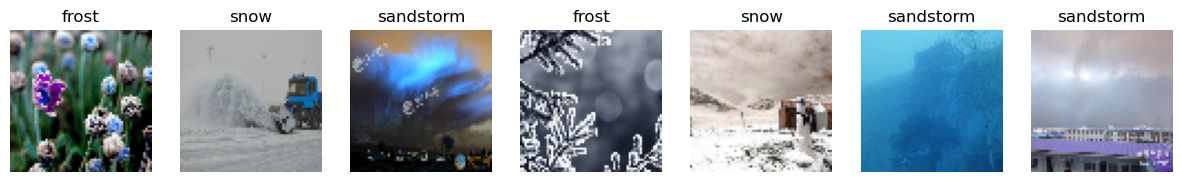

In [27]:
class_names = WeatherImageDF['target'].unique()

num_samples_to_display = 7#Defining the sample of 7 images

# Create a function to display sample images with class names
def display_sample_images(images, labels, class_names):
    fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))
    for i in range(num_samples_to_display):
        ax = axes[i]
        ax.imshow(images[i])
        class_name = class_names[np.argmax(labels[i])]  # Getting the class name based on the one-hot encoded label
        ax.set_title(class_name)
        ax.axis('off')
    plt.show()

# Display sample images from the training dataset
display_sample_images(x_train[:num_samples_to_display], train_y[:num_samples_to_display], class_names)


In [28]:
train_images = x_train
train_labels = train_y
test_images = x_test
test_labels = test_y
val_images = x_val
val_labels = val_y

### CUSTOM CNN WITHOUT DATA AUGMENTATION

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import time


# Create the model or instantiate 
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.7))
# Flatten for fully connected layers
model.add(Flatten())

# Output layer
model.add(Dense(8, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
# Record the start time
start_time = time.time()

# Fit the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels), verbose=1, callbacks=[early_stopping])

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
95/95 [==============================] - 13s 98ms/step - loss: 1.3081 - accuracy: 0.5341 - val_loss: 0.9562 - val_accuracy: 0.6865
Epoch 2/20
95/95 [==============================] - 10s 105ms/step - loss: 0.8736 - accuracy: 0.7034 - val_loss: 0.8508 - val_accuracy: 0.7235
Epoch 3/20
95/95 [==============================] - 10s 101ms/step - loss: 0.7163 - accuracy: 0.7698 - val_loss: 0.7994 - val_accuracy: 0.7143
Epoch 4/20
95/95 [==============================] - 10s 111ms/step - loss: 0.6376 - accuracy: 0.7903 - val_loss: 0.7637 - val_accuracy: 0.7235
Epoch 5/20
95/95 [==============================] - 10s 110ms/step - loss: 0.5451 - accuracy: 0.8264 - val_loss: 0.7302 - val_accuracy: 0.7566
Epoch 6/20
95/95 [==============================] - 9s 93ms/step - loss: 0.4676 - accuracy: 0.8585 - val_loss: 0.6917 - val_accuracy: 0.7646
Epoch 7/20
95/95 [==============================] - 10s 110ms/step - loss: 0.4281 - accuracy: 0.8681 - val_loss: 0.6872 - val_accuracy: 0.7672
Ep

In [31]:
model.save("CnnWeathermodel.h5")

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

30/30 [==============================] - 1s 19ms/step - loss: 0.7038 - accuracy: 0.7693


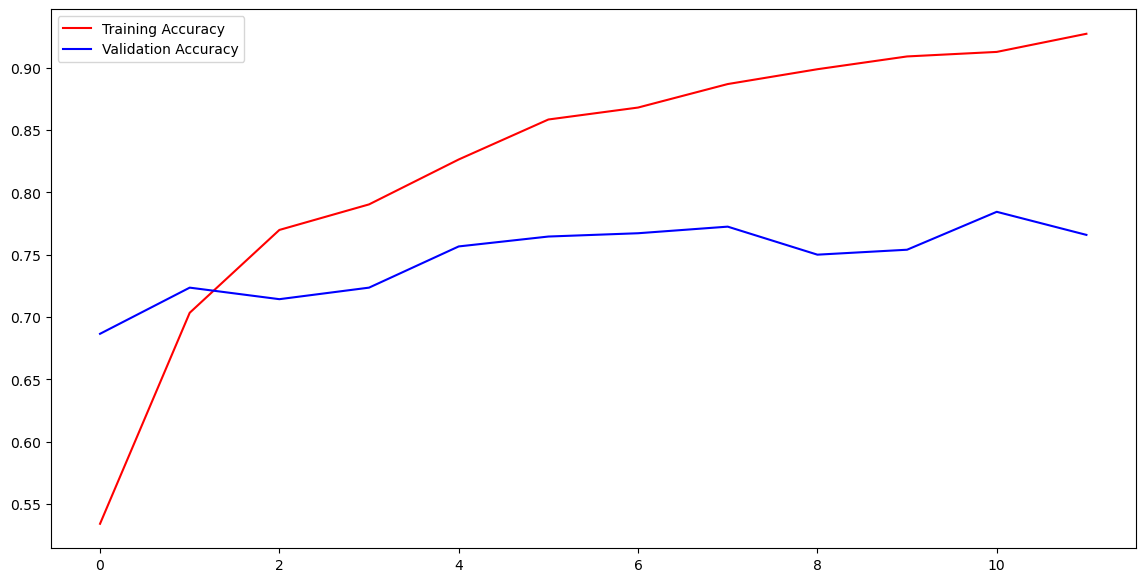

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

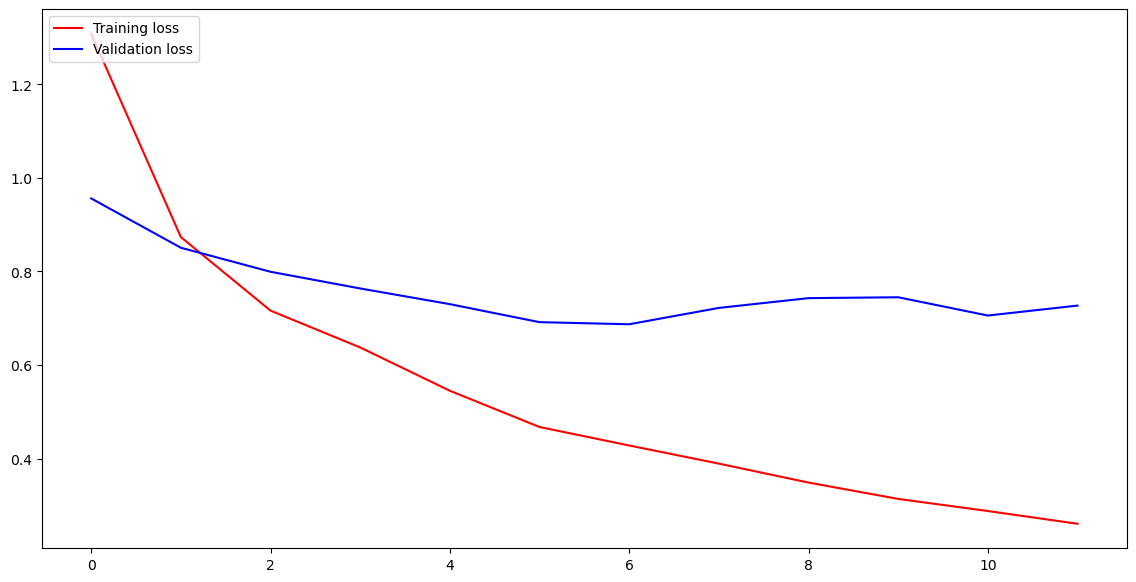

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [35]:
y_pred = model.predict(test_images)

30/30 [==============================] - 1s 22ms/step


### VISUALIZING OUR CNN WITHOUT DATA AUGMENTATION 

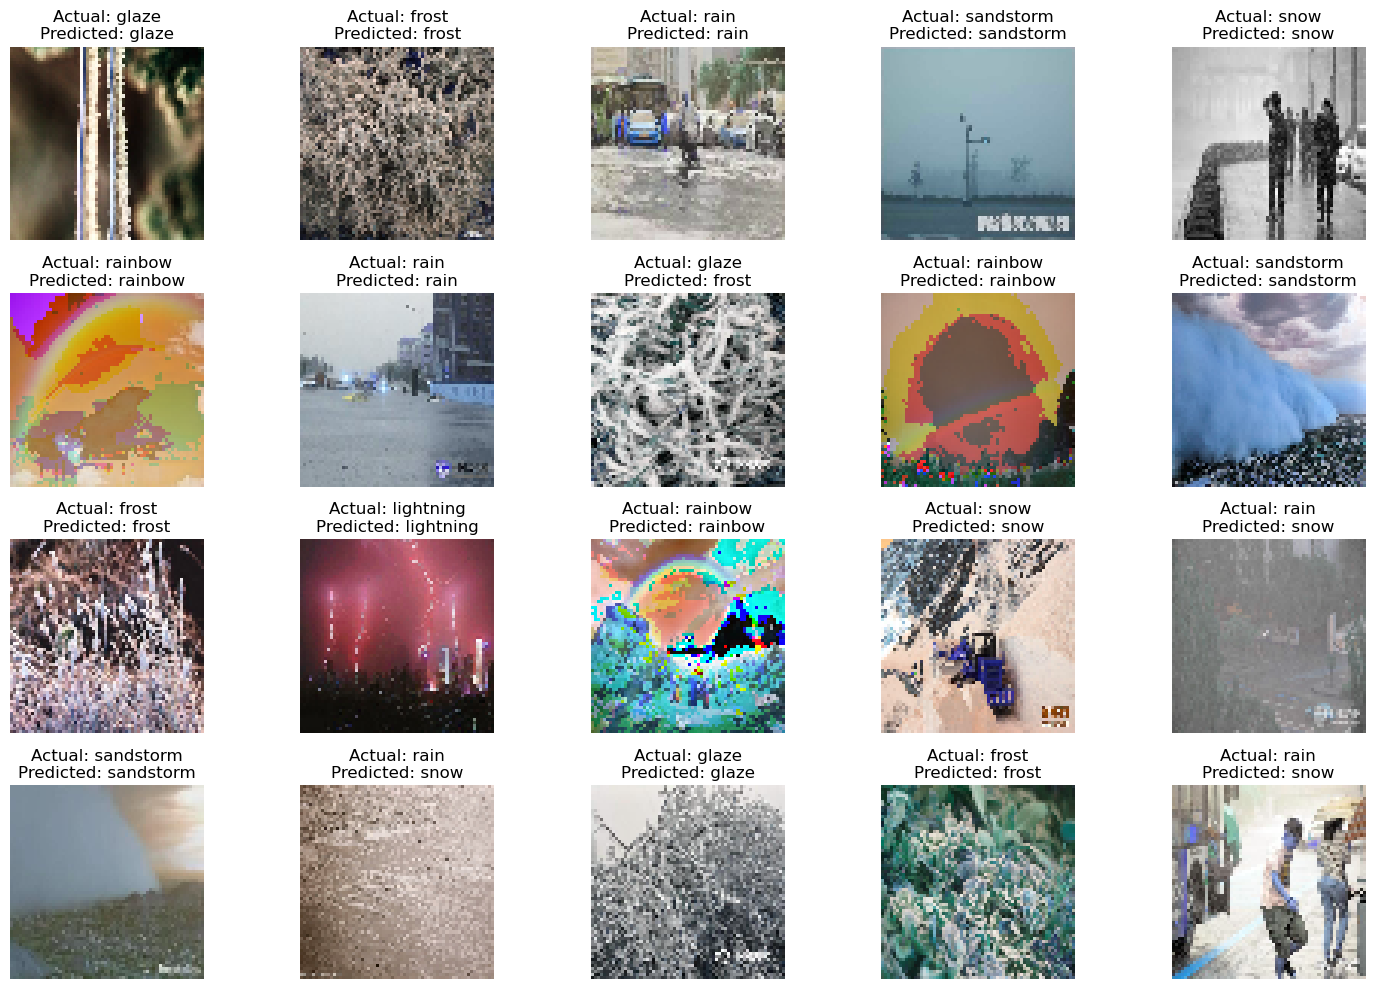

In [36]:
# Defining the respective class names
class_names = WeatherImageDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Getting the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Formatting  the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION METRICS OF CNN WITHOUT DATA AUGMENTATION

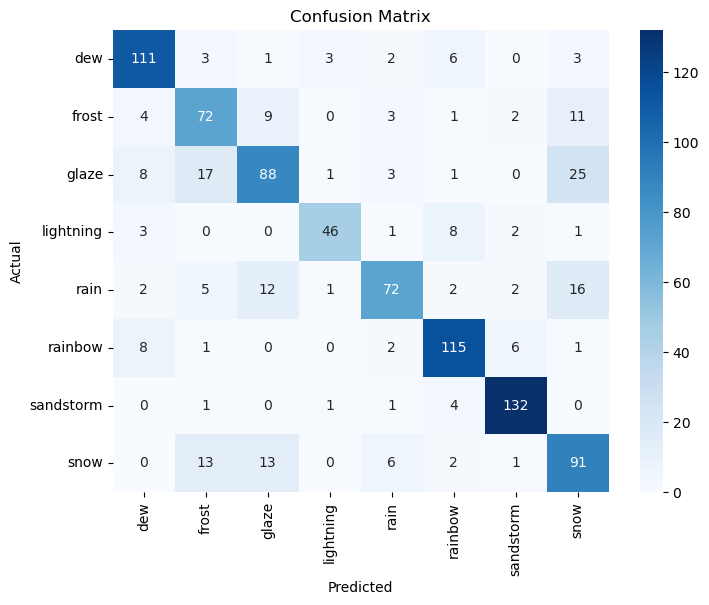

In [37]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plotting of the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
training_accuracy = history.history['accuracy']  
validation_accuracy = history.history['val_accuracy']  # Getting the training and validation accuracy

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9272
Validation Accuracy: 0.7659


In [39]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')

In [40]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.7693
Precision: 0.7733
Recall: 0.7693
F1 Score: 0.7685


In [41]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         dew     0.8162    0.8605    0.8377       129
       frost     0.6429    0.7059    0.6729       102
       glaze     0.7154    0.6154    0.6617       143
   lightning     0.8846    0.7541    0.8142        61
        rain     0.8000    0.6429    0.7129       112
     rainbow     0.8273    0.8647    0.8456       133
   sandstorm     0.9103    0.9496    0.9296       139
        snow     0.6149    0.7222    0.6642       126

    accuracy                         0.7693       945
   macro avg     0.7765    0.7644    0.7673       945
weighted avg     0.7733    0.7693    0.7685       945



### CNN WITH DATA AUGMENTATION
###Real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, 
one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. Taking this attribute into account, we can augment the images using the techniques listed below -
**1. Horizontal Flip** (should be set to True/False)
**2. Vertical Flip** (should be set to True/False) 
**3. Height Shift** (should be between 0 and 1) 
**4. Width Shift** (should be between 0 and 1) 
**5. Rotation** (should be between 0 and 180) 
**6. Shear** (should be between 0 and 1) 
**7. Zoom** (should be between 0 and 1) etc. 


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # How to fill newly created pixels
)


In [43]:
# Create the CnnAugModel with data augmentation layers
CnnAugmodel = models.Sequential()

CnnAugmodel.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(Dropout(0.3))  # Dropout layer
CnnAugmodel.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.00)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))


CnnAugmodel.add(layers.Flatten())
CnnAugmodel.add(layers.Dense(64, activation='relu'))
CnnAugmodel.add(Dropout(0.3))  # Dropout layer
CnnAugmodel.add(layers.Dense(8, activation='softmax'))

In [44]:
from keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
batch_size = 64
CnnAugmodel.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

# Training the CnnAugModel with data augmentation
augmented_train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)


In [45]:
# Record the start time
start_time = time.time()

# Fit the model
history_with_Dataugmentation = CnnAugmodel.fit(augmented_train_generator, epochs=20,
                                           validation_data=(val_images, val_labels),
                                           callbacks=[early_stopping], verbose=1)


# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
48/48 [==============================] - 35s 689ms/step - loss: 2.3012 - accuracy: 0.3052 - val_loss: 2.2499 - val_accuracy: 0.1058
Epoch 2/20
48/48 [==============================] - 38s 787ms/step - loss: 1.7033 - accuracy: 0.4521 - val_loss: 2.3638 - val_accuracy: 0.2169
Epoch 3/20
48/48 [==============================] - 39s 814ms/step - loss: 1.5046 - accuracy: 0.5142 - val_loss: 2.5388 - val_accuracy: 0.1587
Epoch 4/20
48/48 [==============================] - 37s 778ms/step - loss: 1.3970 - accuracy: 0.5400 - val_loss: 2.6265 - val_accuracy: 0.1653
Epoch 5/20
48/48 [==============================] - 35s 717ms/step - loss: 1.2937 - accuracy: 0.5708 - val_loss: 2.5199 - val_accuracy: 0.1892
Epoch 6/20
48/48 [==============================] - 40s 795ms/step - loss: 1.2731 - accuracy: 0.5929 - val_loss: 2.2658 - val_accuracy: 0.2778
Epoch 7/20
48/48 [==============================] - 35s 724ms/step - loss: 1.2251 - accuracy: 0.6005 - val_loss: 1.9959 - val_accuracy: 0.3796

In [ ]:
# CnnAugmodel.save("DaAugmCnnWeathermodel.h5")

In [46]:
test_loss, test_acc = CnnAugmodel.evaluate(test_images, test_labels, verbose=1)

30/30 [==============================] - 4s 133ms/step - loss: 1.0378 - accuracy: 0.6698


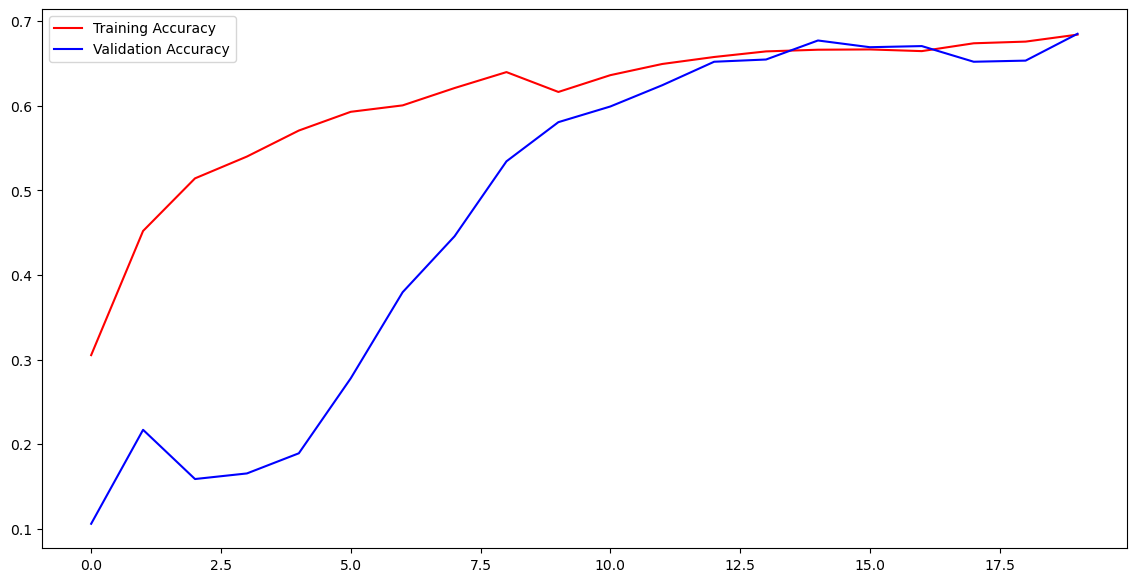

In [47]:
acc = history_with_Dataugmentation.history['accuracy']
val_acc = history_with_Dataugmentation.history['val_accuracy']

epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

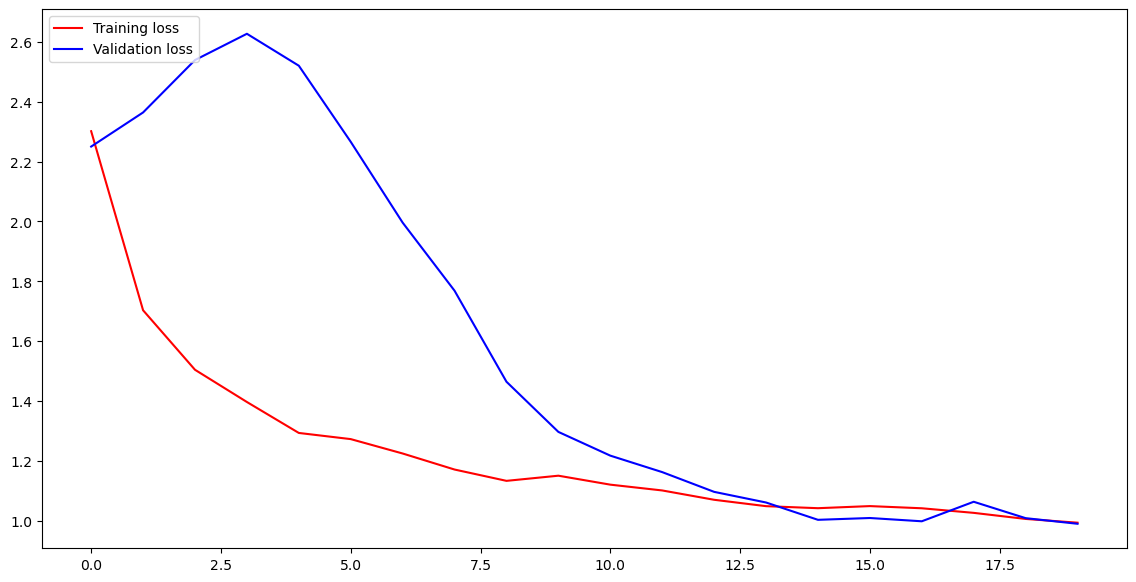

In [48]:
loss =  history_with_Dataugmentation.history['loss']
val_loss =  history_with_Dataugmentation.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [49]:
training_accuracy = history_with_Dataugmentation.history['accuracy']  
validation_accuracy = history_with_Dataugmentation.history['val_accuracy']  

# Print the last epoch's accuracies (you can iterate over all epochs if needed)
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.6842
Validation Accuracy: 0.6852


In [50]:
y_pred = CnnAugmodel.predict(test_images)

30/30 [==============================] - 3s 99ms/step


### VISUALIZING OUR PREDICTION FOR CNN WITH DATA AUGMENTATION

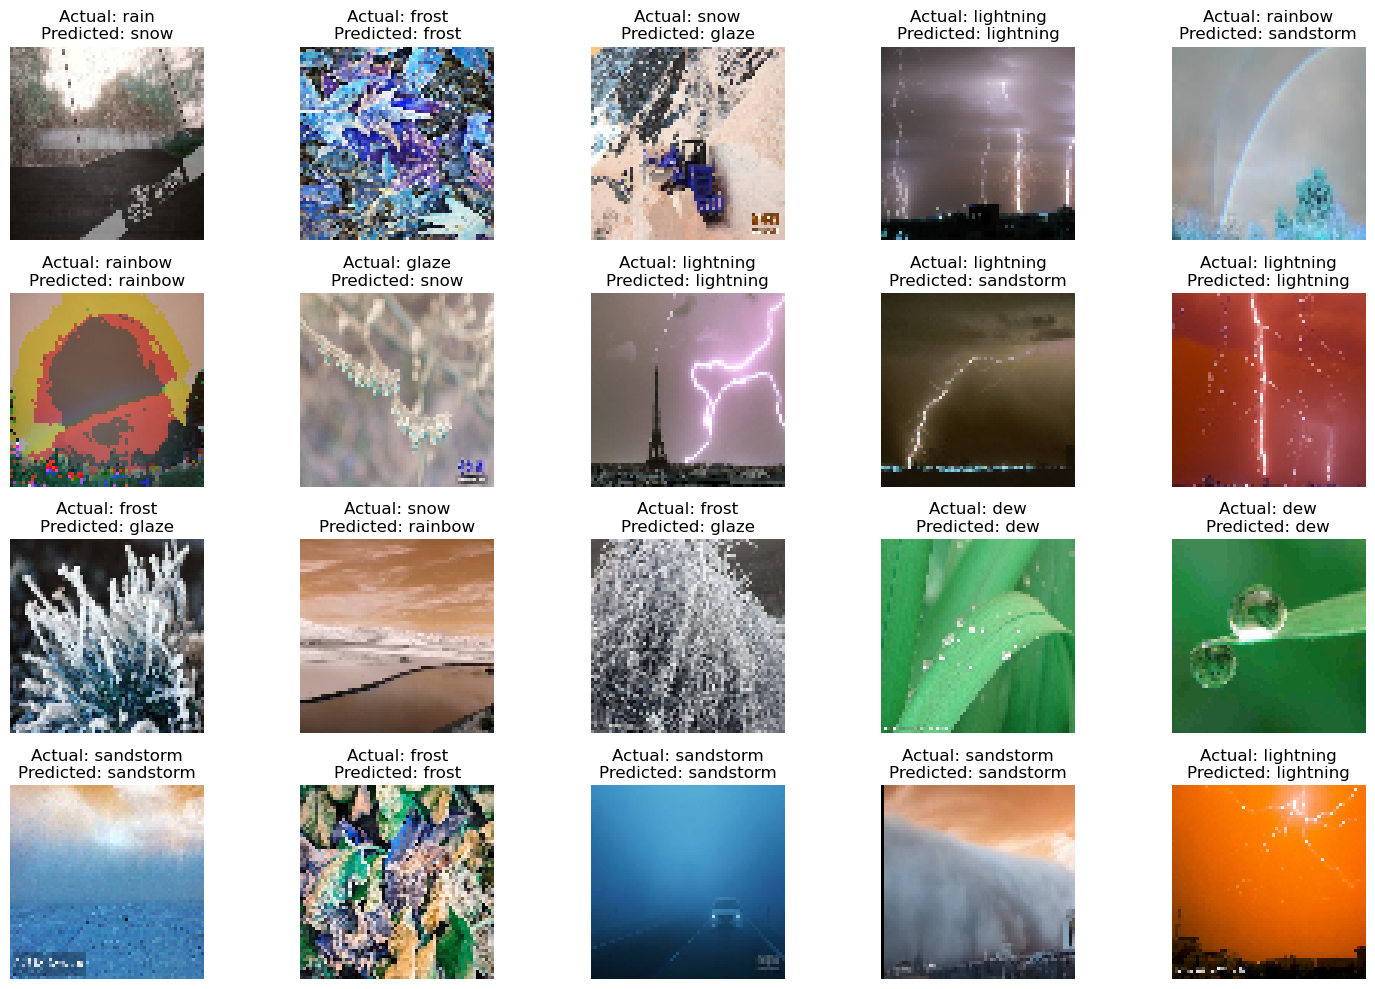

In [51]:
# Define class names
# class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
class_names =  WeatherImageDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Get the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Format the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION MATRIX FOR CNN WITH DATA AUGMENTATION

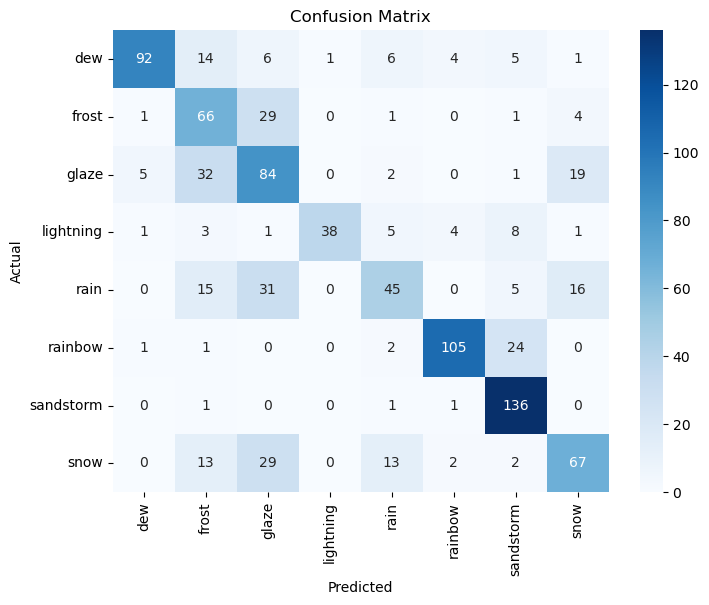

In [52]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### EVALUATION METRICS FOR CNN WITH DATA AUGMENTATION

In [53]:
training_accuracy = history_with_Dataugmentation.history['accuracy']  
validation_accuracy = history_with_Dataugmentation.history['val_accuracy']  

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.6842
Validation Accuracy: 0.6852


In [54]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')


In [55]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.6698
Precision: 0.6994
Recall: 0.6698
F1 Score: 0.6719


In [56]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         dew     0.9200    0.7132    0.8035       129
       frost     0.4552    0.6471    0.5344       102
       glaze     0.4667    0.5874    0.5201       143
   lightning     0.9744    0.6230    0.7600        61
        rain     0.6000    0.4018    0.4813       112
     rainbow     0.9052    0.7895    0.8434       133
   sandstorm     0.7473    0.9784    0.8474       139
        snow     0.6204    0.5317    0.5726       126

    accuracy                         0.6698       945
   macro avg     0.7111    0.6590    0.6703       945
weighted avg     0.6994    0.6698    0.6719       945



# Implementation of **Transfer Learning**
We will be loading a pre-built architecture- which was trained on the ImageNet dataset. The transfer learning model built is DenseNet-201

In [57]:
num_classes = 8
img_width, img_height = 64, 64
batch_size = 64
from tensorflow.keras.applications import DenseNet201

# Load pre-trained DenseNet-201 model
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze all layers in the pre-trained DenseNet-201 model
for layer in densenet201_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = densenet201_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)

# Output layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
densenet201_model_finetuned = Model(inputs=densenet201_model.input, outputs=predictions)

In [58]:
# Compile the model
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
densenet201_model_finetuned.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [59]:
# Record the start time
start_time = time.time()

# Fit the model
history = densenet201_model_finetuned.fit(train_images, train_labels, epochs=20, batch_size=batch_size, validation_data=(val_images, val_labels), callbacks=[early_stopping], verbose=1)


# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
48/48 [==============================] - 121s 2s/step - loss: 0.8199 - accuracy: 0.7212 - val_loss: 0.7033 - val_accuracy: 0.7712
Epoch 2/20
48/48 [==============================] - 96s 2s/step - loss: 0.2477 - accuracy: 0.9226 - val_loss: 0.5775 - val_accuracy: 0.8108
Epoch 3/20
48/48 [==============================] - 98s 2s/step - loss: 0.1297 - accuracy: 0.9590 - val_loss: 0.5615 - val_accuracy: 0.8280
Epoch 4/20
48/48 [==============================] - 96s 2s/step - loss: 0.0779 - accuracy: 0.9795 - val_loss: 0.5683 - val_accuracy: 0.8320
Epoch 5/20
48/48 [==============================] - 99s 2s/step - loss: 0.0629 - accuracy: 0.9854 - val_loss: 0.6228 - val_accuracy: 0.8214
Epoch 6/20
48/48 [==============================] - 96s 2s/step - loss: 0.0291 - accuracy: 0.9957 - val_loss: 0.6021 - val_accuracy: 0.8360
Epoch 7/20
48/48 [==============================] - 92s 2s/step - loss: 0.0333 - accuracy: 0.9927 - val_loss: 0.6119 - val_accuracy: 0.8320
Epoch 8/20
48/48 [=

In [60]:
densenet201_model_finetuned.save("Densnet201Weathermodel.h5") #saving of our densnet201 model

In [61]:
test_loss, test_acc = densenet201_model_finetuned.evaluate(test_images, test_labels, verbose=1)

30/30 [==============================] - 26s 881ms/step - loss: 0.5727 - accuracy: 0.8127


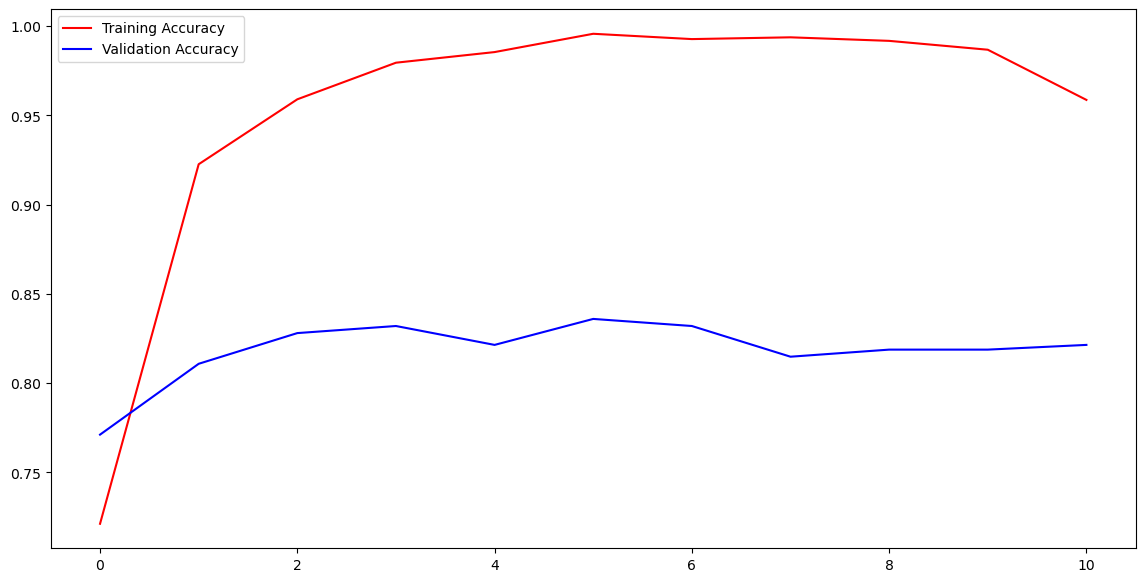

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

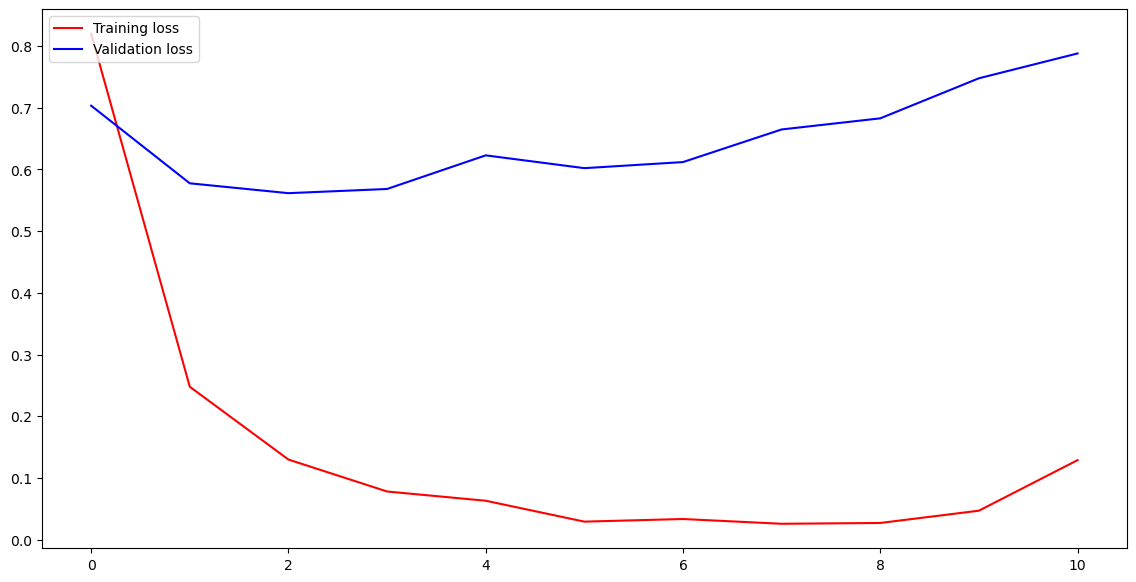

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [64]:
y_pred = densenet201_model_finetuned.predict(test_images)

30/30 [==============================] - 30s 827ms/step


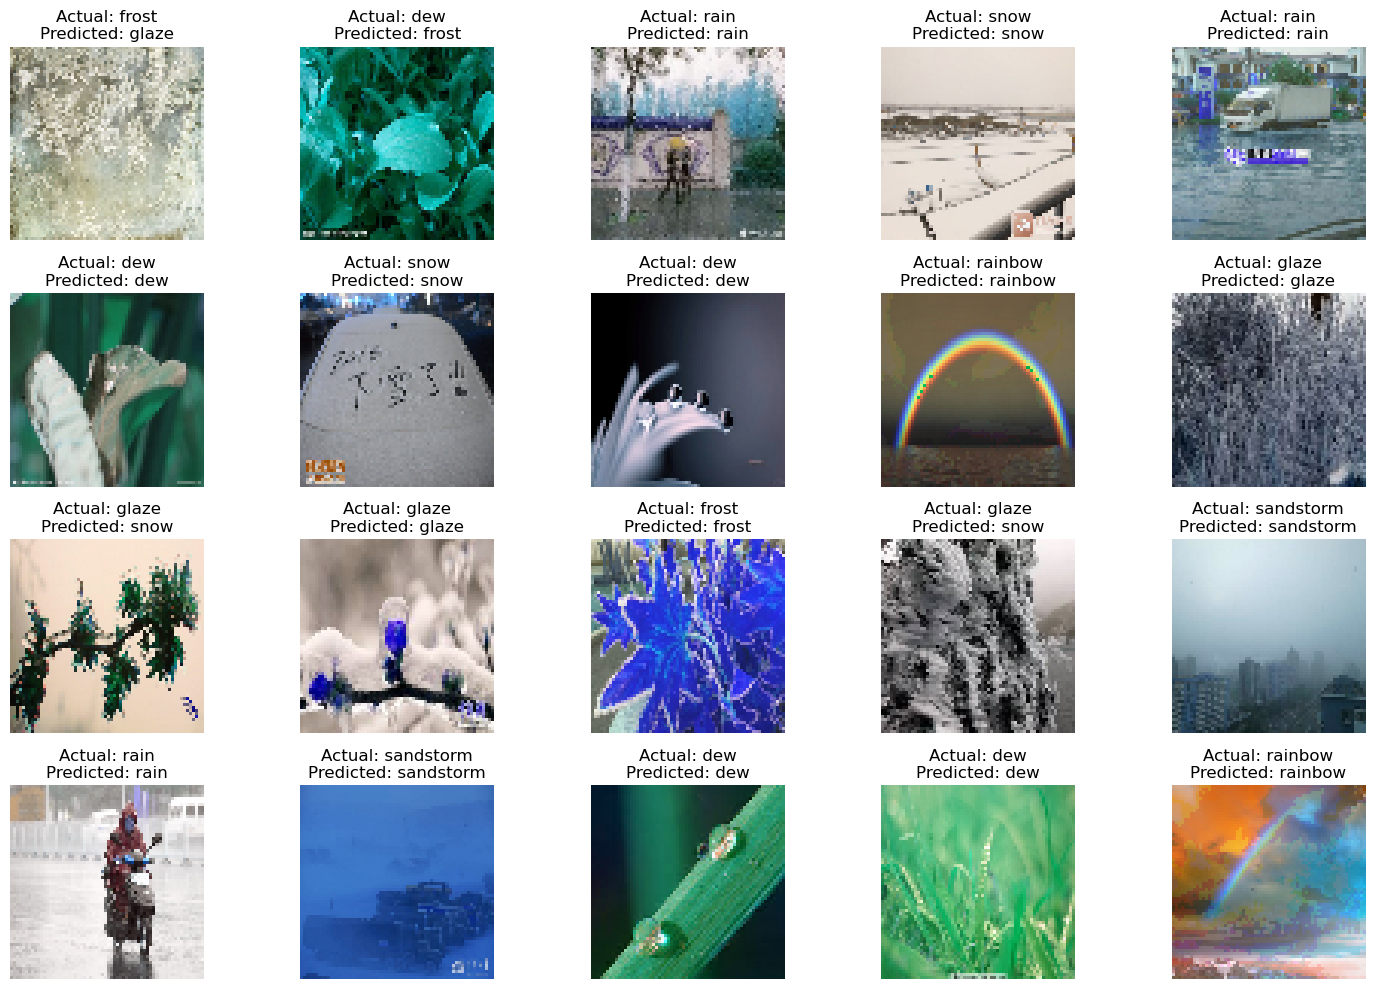

In [65]:
# Define class names
class_names = WeatherImageDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Get the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Format the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION MATRIX FOR DENSENET201

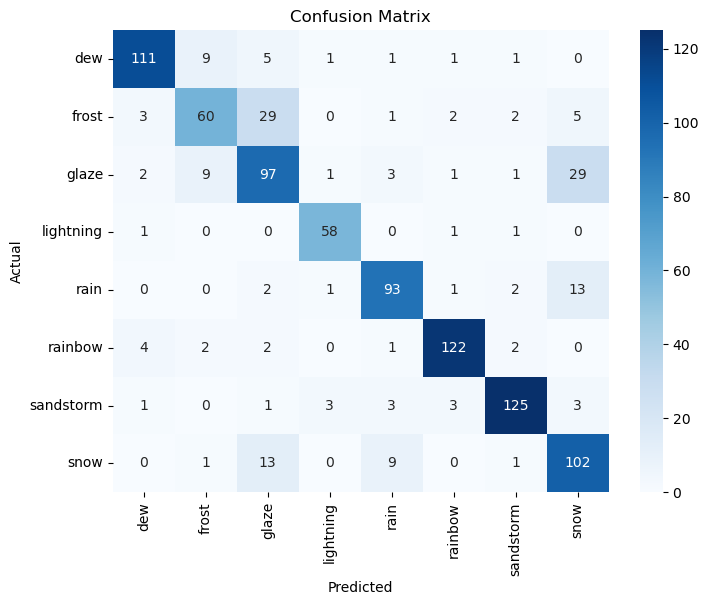

In [66]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [67]:
training_accuracy = history.history['accuracy']  
validation_accuracy = history.history['val_accuracy']  

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9587
Validation Accuracy: 0.8214


In [69]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')

In [70]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.8127
Precision: 0.8172
Recall: 0.8127
F1 Score: 0.8129


In [71]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

         dew     0.9098    0.8605    0.8845       129
       frost     0.7407    0.5882    0.6557       102
       glaze     0.6510    0.6783    0.6644       143
   lightning     0.9062    0.9508    0.9280        61
        rain     0.8378    0.8304    0.8341       112
     rainbow     0.9313    0.9173    0.9242       133
   sandstorm     0.9259    0.8993    0.9124       139
        snow     0.6711    0.8095    0.7338       126

    accuracy                         0.8127       945
   macro avg     0.8217    0.8168    0.8171       945
weighted avg     0.8172    0.8127    0.8129       945

